In [23]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u 
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord
from matplotlib import colormaps

In [2]:
#Abrimos imagenes de ciencia, NGC7293, filtro V, 600 segundos
v1 = fits.open('RAW/Light_Mouse_click_position_V_600.000secs_00000061.fit')
v2 = fits.open('RAW/Light_Mouse_click_position_V_600.000secs_00000062.fit')
v3 = fits.open('RAW/Light_Mouse_click_position_V_600.000secs_00000063.fit')

v1[0].data

array([[117, 139, 124, ..., 126, 129, 125],
       [138, 139, 125, ..., 142, 139, 135],
       [117, 114, 135, ..., 126, 119, 138],
       ...,
       [192, 203, 208, ..., 142, 130, 158],
       [180, 184, 209, ..., 133, 147, 143],
       [210, 208, 205, ..., 145, 135, 152]], dtype=uint16)

In [3]:
#Abrimos imagenes de ciencia, NGC7293, filtro B, 600 segundos
b1 = fits.open('RAW/Light_Mouse_click_position_B_600.000secs_00000064.fit')
b2 = fits.open('RAW/Light_Mouse_click_position_B_600.000secs_00000065.fit')
b3 = fits.open('RAW/Light_Mouse_click_position_B_600.000secs_00000066.fit')

In [4]:
#Extraemos las imagenes
datav1 = v1[0].data
datav2 = v2[0].data
datav3 = v3[0].data

datab1 = b1[0].data
datab2 = b2[0].data
datab3 = b3[0].data

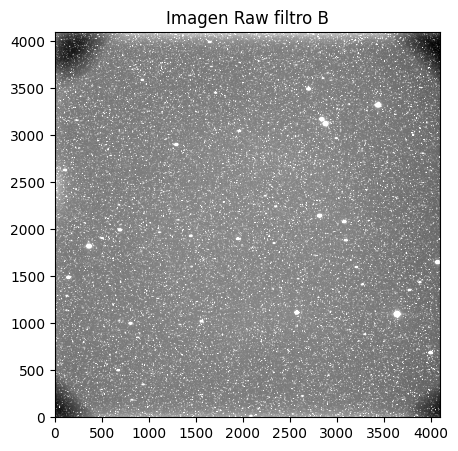

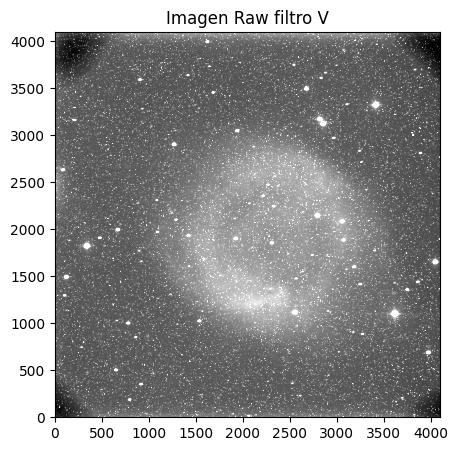

In [5]:
#Graficamos los primeros raw
zscale = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale.get_limits(datab2) #El datav1 depende de que imagen queramos ver

#Ploteamos al figura
fig = plt.figure(figsize = (5,5))
plt.imshow(datab1 , vmin=min_value , vmax=max_value , cmap='gray' , origin='lower')
plt.title('Imagen Raw filtro B')
plt.show()

#---------------------------------------

fig = plt.figure(figsize = (5,5))
plt.imshow(datav1 , vmin=min_value , vmax=max_value , cmap='gray' , origin='lower')
plt.title('Imagen Raw filtro V')
plt.show()

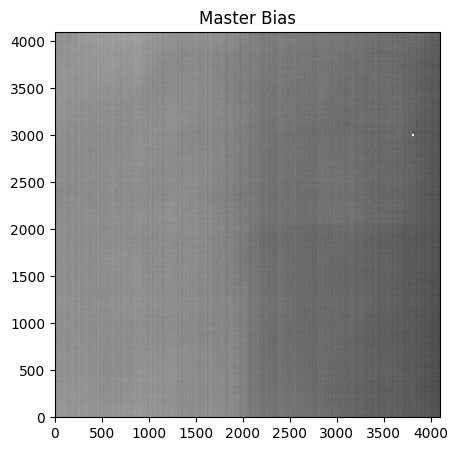

In [6]:
#Masterbias, no sirve de mucho porque tenemos los darks, pero ta bien
bias1 = fits.open('Provisional/bias/Bias_1x1_00000357.fit')[0].data
bias2 = fits.open('Provisional/bias/Bias_1x1_00000358.fit')[0].data
bias3 = fits.open('Provisional/bias/Bias_1x1_00000359.fit')[0].data
bias4 = fits.open('Provisional/bias/Bias_1x1_00000360.fit')[0].data
bias5 = fits.open('Provisional/bias/Bias_1x1_00000361.fit')[0].data
bias6 = fits.open('Provisional/bias/Bias_1x1_00000362.fit')[0].data
bias7 = fits.open('Provisional/bias/Bias_1x1_00000363.fit')[0].data
bias8 = fits.open('Provisional/bias/Bias_1x1_00000364.fit')[0].data
bias9 = fits.open('Provisional/bias/Bias_1x1_00000365.fit')[0].data
bias10 = fits.open('Provisional/bias/Bias_1x1_00000366.fit')[0].data

master_bias = np.mean([bias1,bias1,bias3,bias4,bias5,bias6,bias7,bias8,bias9,bias10],axis=0)

#Grafiquemoslo
fig=plt.figure(figsize=(5,5))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_bias)

plt.imshow(master_bias,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master Bias')
plt.show()

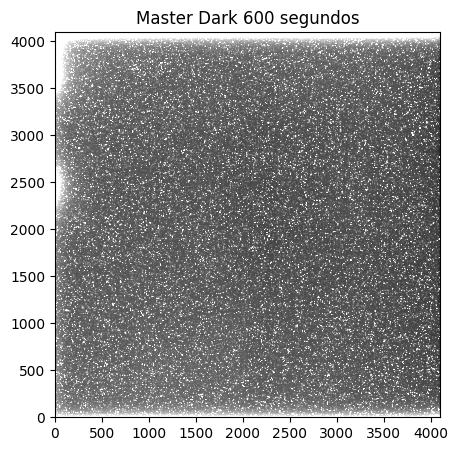

In [7]:
#Master dark
dark1 = fits.open('Provisional/dark/Dark_600.000secs_00000208.fit')[0].data
dark2 = fits.open('Provisional/dark/Dark_600.000secs_00000209.fit')[0].data
dark3 = fits.open('Provisional/dark/Dark_600.000secs_00000210.fit')[0].data
dark4 = fits.open('Provisional/dark/Dark_600.000secs_00000211.fit')[0].data
dark5 = fits.open('Provisional/dark/Dark_600.000secs_00000212.fit')[0].data
dark6 = fits.open('Provisional/dark/Dark_600.000secs_00000213.fit')[0].data
dark7 = fits.open('Provisional/dark/Dark_600.000secs_00000214.fit')[0].data
dark8 = fits.open('Provisional/dark/Dark_600.000secs_00000215.fit')[0].data
dark9 = fits.open('Provisional/dark/Dark_600.000secs_00000216.fit')[0].data
dark10 = fits.open('Provisional/dark/Dark_600.000secs_00000217.fit')[0].data

master_dark = np.median([dark1,dark2,dark3,dark4,dark5,dark6,dark7,dark8,dark9,dark10],axis=0)
dark_current_big = np.mean([dark1 - master_bias,dark2 - master_bias,dark3 - master_bias,dark4 - master_bias,dark5 - master_bias,dark6 - master_bias,dark7 - master_bias,dark8 - master_bias,dark9 - master_bias,dark10 - master_bias],axis=0)/600
#Grafiquemoslos
fig=plt.figure(figsize=(5,5))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_dark)

plt.imshow(master_dark,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master Dark 600 segundos')
plt.show()

In [8]:
#Linea para hacer el dark current con los darks chicos
ltldark1 = fits.open('Provisional/dark/Dark_20.000secs_00000027.fit')[0].data
ltldark2 = fits.open('Provisional/dark/Dark_20.000secs_00000028.fit')[0].data
ltldark3 = fits.open('Provisional/dark/Dark_20.000secs_00000029.fit')[0].data
ltldark4 = fits.open('Provisional/dark/Dark_20.000secs_00000030.fit')[0].data
ltldark5 = fits.open('Provisional/dark/Dark_20.000secs_00000031.fit')[0].data
ltldark6 = fits.open('Provisional/dark/Dark_20.000secs_00000032.fit')[0].data
ltldark7 = fits.open('Provisional/dark/Dark_20.000secs_00000033.fit')[0].data
ltldark8 = fits.open('Provisional/dark/Dark_20.000secs_00000034.fit')[0].data
ltldark9 = fits.open('Provisional/dark/Dark_20.000secs_00000035.fit')[0].data
ltldark10 = fits.open('Provisional/dark/Dark_20.000secs_00000036.fit')[0].data

baby_dark = np.median([ltldark1,ltldark2,ltldark3,ltldark4,ltldark5,ltldark6,ltldark7,ltldark8,ltldark9,ltldark10],axis=0)
dark_current = np.mean([ltldark1 - master_bias,ltldark2 - master_bias,ltldark3 - master_bias,ltldark4 - master_bias,ltldark5 - master_bias,ltldark6 - master_bias,ltldark7 - master_bias,ltldark8 - master_bias,ltldark9 - master_bias,ltldark10 - master_bias],axis=0)/20


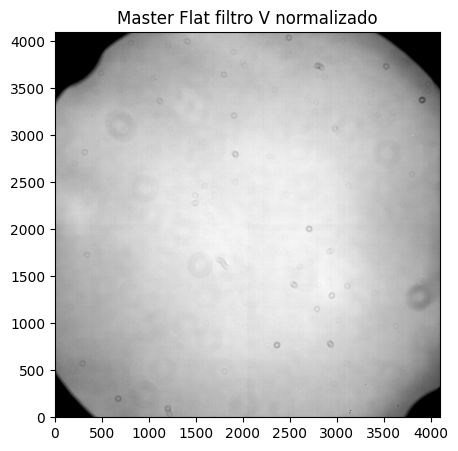

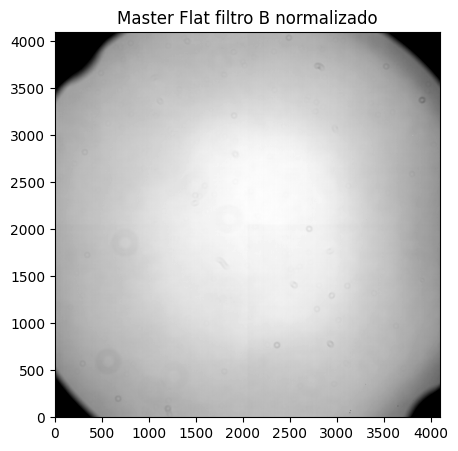

In [9]:
#Flats y master flat filtro B

flatb1 = fits.open('Provisional/Flats/FLAT_B_B11-001.fit')[0].data
flatb2 = fits.open('Provisional/Flats/FLAT_B_B11-002.fit')[0].data
flatb3 = fits.open('Provisional/Flats/FLAT_B_B11-003.fit')[0].data
flatb4 = fits.open('Provisional/Flats/FLAT_B_B11-004.fit')[0].data
flatb5 = fits.open('Provisional/Flats/FLAT_B_B11-005.fit')[0].data
flatb6 = fits.open('Provisional/Flats/FLAT_B_B11-006.fit')[0].data
flatb7 = fits.open('Provisional/Flats/FLAT_B_B11-007.fit')[0].data
flatb8 = fits.open('Provisional/Flats/FLAT_B_B11-008.fit')[0].data
flatb9 = fits.open('Provisional/Flats/FLAT_B_B11-009.fit')[0].data
flatb10 = fits.open('Provisional/Flats/FLAT_B_B11-010.fit')[0].data

master_flatb = np.median([flatb1,flatb2,flatb3,flatb4,flatb5,flatb6,flatb7,flatb8,flatb9,flatb10],axis=0)
master_flatb_norm  = master_flatb/np.mean(master_flatb)

#Flats y master flat filtro V

flatv1 = fits.open('Provisional/Flats/FLAT_V_B11-001.fit')[0].data
flatv2 = fits.open('Provisional/Flats/FLAT_V_B11-002.fit')[0].data
flatv3 = fits.open('Provisional/Flats/FLAT_V_B11-003.fit')[0].data
flatv4 = fits.open('Provisional/Flats/FLAT_V_B11-004.fit')[0].data
flatv5 = fits.open('Provisional/Flats/FLAT_V_B11-005.fit')[0].data
flatv6 = fits.open('Provisional/Flats/FLAT_V_B11-006.fit')[0].data
flatv7 = fits.open('Provisional/Flats/FLAT_V_B11-007.fit')[0].data
flatv8 = fits.open('Provisional/Flats/FLAT_V_B11-008.fit')[0].data
flatv9 = fits.open('Provisional/Flats/FLAT_V_B11-009.fit')[0].data
flatv10 = fits.open('Provisional/Flats/FLAT_V_B11-010.fit')[0].data

master_flatv = np.median([flatv1,flatv2,flatv3,flatv4,flatv5,flatv6,flatv7,flatv8,flatv9,flatv10],axis=0)
master_flatv_norm  = master_flatv/np.mean(master_flatv)

#Grafiquemos
fig=plt.figure(figsize=(5,5))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_flatv_norm)

plt.imshow(master_flatv_norm,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master Flat filtro V normalizado')
plt.show()

#Grafiquemos
fig=plt.figure(figsize=(5,5))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_flatb_norm)

plt.imshow(master_flatb_norm,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master Flat filtro B normalizado')
plt.show()

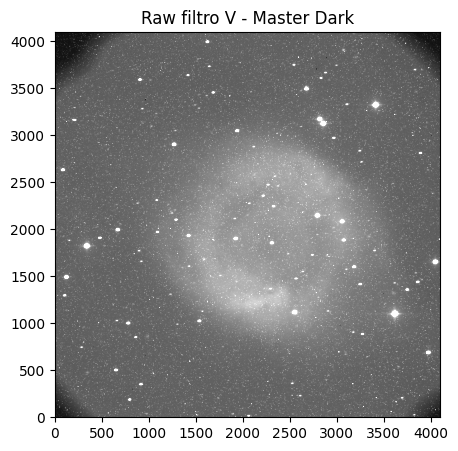

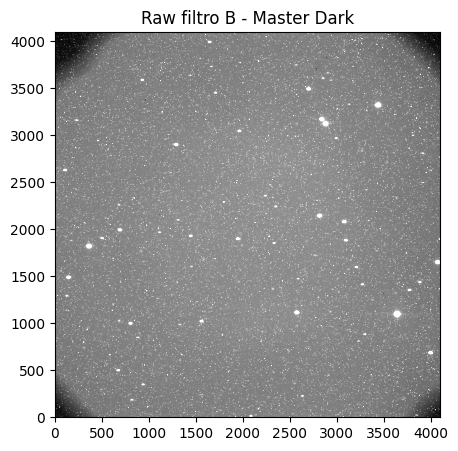

In [20]:
fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(datav1-master_dark)

plt.imshow(datav1-master_dark,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Raw filtro V - Master Dark')
plt.show()

#################################

fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(datab1-master_dark)

plt.imshow(datab1-master_dark,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Raw filtro B - Master Dark')
plt.show()


In [10]:
#Creamos las imagenes finales para cada filtro

img1b = (datab1-master_dark)/master_flatb_norm
img2b = (datab2-master_dark)/master_flatb_norm
img3b = (datab3-master_dark)/master_flatb_norm

img1v = (datav1-master_dark)/master_flatv_norm
img2v = (datav2-master_dark)/master_flatv_norm
img3v = (datav3-master_dark)/master_flatv_norm

bpm = fits.open('BPM (1).fit')[0].data

img_final_b = np.mean([img1b,img2b,img3b],axis=0)*bpm
img_final_v = np.mean([img1v,img2v,img3v],axis=0)*bpm

C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\755768875.py:3: RuntimeWarning: invalid value encountered in divide
  img1b = (datab1-master_dark)/master_flatb_norm
C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\755768875.py:4: RuntimeWarning: invalid value encountered in divide
  img2b = (datab2-master_dark)/master_flatb_norm
C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\755768875.py:5: RuntimeWarning: invalid value encountered in divide
  img3b = (datab3-master_dark)/master_flatb_norm
C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\755768875.py:7: RuntimeWarning: invalid value encountered in divide
  img1v = (datav1-master_dark)/master_flatv_norm
C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\755768875.py:8: RuntimeWarning: invalid value encountered in divide
  img2v = (datav2-master_dark)/master_flatv_norm
C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\755768875.py:9: RuntimeWarning: invalid value encountered in divide
  img3v = (datav3-master_dark)/master_flatv_nor

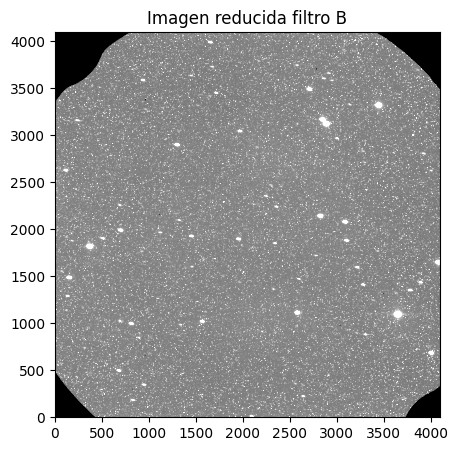

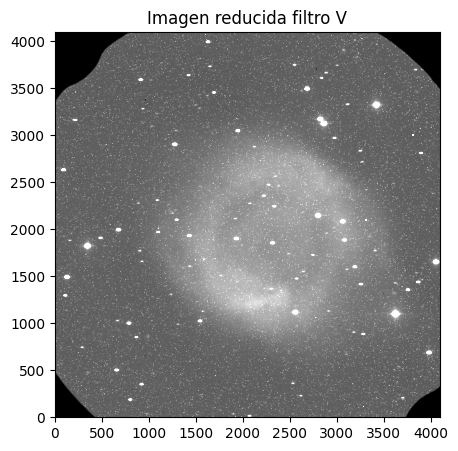

In [11]:
#Ploteamos ambas imagenes

fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(img_final_b)

plt.imshow(img_final_b,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen reducida filtro B')
plt.show()

fig = plt.figure(figsize=(5,5))
zscale_v = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_v.get_limits(img_final_v)

plt.imshow(img_final_v,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen reducida filtro V')
plt.show()

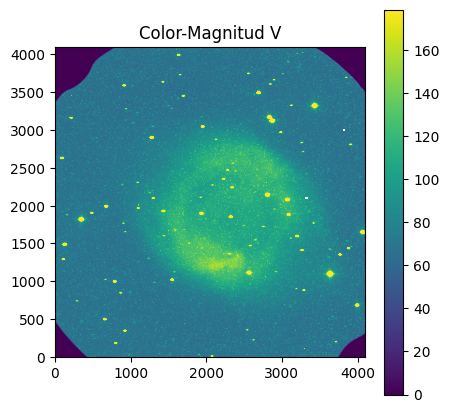

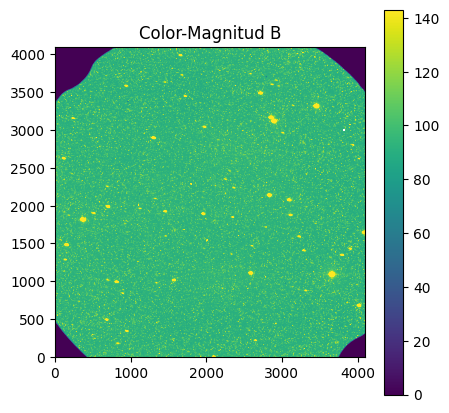

In [29]:
vfinal = fits.open('Img_V.fits')[0].data
bfinal = fits.open('Img_B.fits')[0].data

fig = plt.figure(figsize=(5,5))
zscale_v = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_v.get_limits(vfinal)

plt.imshow(vfinal,vmin=min_value,vmax=max_value,cmap='viridis',origin='lower')
plt.title('Color-Magnitud V')
plt.colorbar()




fig = plt.figure(figsize=(5,5))
zscale_v = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_v.get_limits(bfinal)

plt.imshow(bfinal,vmin=0,vmax=max_value,cmap='viridis',origin='lower')
plt.title('Color-Magnitud B')
plt.colorbar()

In [12]:
#Creación fits y astrometría

phdu = fits.PrimaryHDU(header = b1[0].header , data = img_final_b)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f'{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}', unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Cortes, G. Guerrero, Martinez'

phdu.writeto('Img_B.fits', overwrite = True)

In [13]:
phdu = fits.PrimaryHDU(header = v1[0].header , data = img_final_v)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f'{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}', unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Cortes, G. Guerrero, Martinez'

phdu.writeto('Img_V.fits', overwrite = True)

In [14]:
#Veo que wea tiene

test = fits.open('Img_B.fits')

test[0].header



SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Cortes, G. Guerrero, Martinez' / SBIGFITSEXT The name of the observer
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{b050d95e-89ed-41

In [15]:
star1_1B = fits.open('Estrellas/HIP 277/Light_Mouse_click_position_B_20.000secs_00000103.fit')
star1_2B = fits.open('Estrellas/HIP 277/Light_Mouse_click_position_B_20.000secs_00000104.fit')
star1_3B = fits.open('Estrellas/HIP 277/Light_Mouse_click_position_B_20.000secs_00000105.fit')
star1_4B = fits.open('Estrellas/HIP 277/Light_Mouse_click_position_B_20.000secs_00000106.fit')
star1_5B = fits.open('Estrellas/HIP 277/Light_Mouse_click_position_B_20.000secs_00000107.fit')

star1_1V = fits.open('Estrellas/HIP 277/Light_Mouse_click_position_V_5.000secs_00000098.fit')
star1_2V = fits.open('Estrellas/HIP 277/Light_Mouse_click_position_V_5.000secs_00000099.fit')
star1_3V = fits.open('Estrellas/HIP 277/Light_Mouse_click_position_V_5.000secs_00000100.fit')
star1_4V = fits.open('Estrellas/HIP 277/Light_Mouse_click_position_V_5.000secs_00000101.fit')
star1_5V = fits.open('Estrellas/HIP 277/Light_Mouse_click_position_V_5.000secs_00000102.fit')

star2_1B = fits.open('Estrellas/HIP 1101/Light_Mouse_click_position_B_20.000secs_00000116.fit')
star2_2B = fits.open('Estrellas/HIP 1101/Light_Mouse_click_position_B_20.000secs_00000117.fit')
star2_3B = fits.open('Estrellas/HIP 1101/Light_Mouse_click_position_B_20.000secs_00000118.fit')
star2_4B = fits.open('Estrellas/HIP 1101/Light_Mouse_click_position_B_20.000secs_00000119.fit')
star2_5B = fits.open('Estrellas/HIP 1101/Light_Mouse_click_position_B_20.000secs_00000120.fit')

star2_1V = fits.open('Estrellas/HIP 1101/Light_Mouse_click_position_V_5.000secs_00000111.fit')
star2_2V = fits.open('Estrellas/HIP 1101/Light_Mouse_click_position_V_5.000secs_00000112.fit')
star2_3V = fits.open('Estrellas/HIP 1101/Light_Mouse_click_position_V_5.000secs_00000113.fit')
star2_4V = fits.open('Estrellas/HIP 1101/Light_Mouse_click_position_V_5.000secs_00000114.fit')
star2_5V = fits.open('Estrellas/HIP 1101/Light_Mouse_click_position_V_5.000secs_00000115.fit')

red_star_1B_1 = (star1_1B[0].data-baby_dark)/master_flatb_norm
red_star_1B_2 = (star1_2B[0].data-baby_dark)/master_flatb_norm
red_star_1B_3 = (star1_3B[0].data-baby_dark)/master_flatb_norm
red_star_1B_4 = (star1_4B[0].data-baby_dark)/master_flatb_norm
red_star_1B_5 = (star1_5B[0].data-baby_dark)/master_flatb_norm

red_star_1V_1 = (star1_1V[0].data-master_bias-dark_current*5)/master_flatv_norm
red_star_1V_2 = (star1_2V[0].data-master_bias-dark_current*5)/master_flatv_norm
red_star_1V_3 = (star1_3V[0].data-master_bias-dark_current*5)/master_flatv_norm
red_star_1V_4 = (star1_4V[0].data-master_bias-dark_current*5)/master_flatv_norm
red_star_1V_5 = (star1_5V[0].data-master_bias-dark_current*5)/master_flatv_norm

red_star_2B_1 = (star2_1B[0].data-baby_dark)/master_flatb_norm
red_star_2B_2 = (star2_2B[0].data-baby_dark)/master_flatb_norm
red_star_2B_3 = (star2_3B[0].data-baby_dark)/master_flatb_norm
red_star_2B_4 = (star2_4B[0].data-baby_dark)/master_flatb_norm
red_star_2B_5 = (star2_5B[0].data-baby_dark)/master_flatb_norm

red_star_2V_1 = (star2_1V[0].data-master_bias-dark_current*5)/master_flatv_norm
red_star_2V_2 = (star2_2V[0].data-master_bias-dark_current*5)/master_flatv_norm
red_star_2V_3 = (star2_3V[0].data-master_bias-dark_current*5)/master_flatv_norm
red_star_2V_4 = (star2_4V[0].data-master_bias-dark_current*5)/master_flatv_norm
red_star_2V_5 = (star2_5V[0].data-master_bias-dark_current*5)/master_flatv_norm

C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\75089298.py:25: RuntimeWarning: invalid value encountered in divide
  red_star_1B_1 = (star1_1B[0].data-baby_dark)/master_flatb_norm
C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\75089298.py:26: RuntimeWarning: invalid value encountered in divide
  red_star_1B_2 = (star1_2B[0].data-baby_dark)/master_flatb_norm
C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\75089298.py:27: RuntimeWarning: invalid value encountered in divide
  red_star_1B_3 = (star1_3B[0].data-baby_dark)/master_flatb_norm
C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\75089298.py:28: RuntimeWarning: invalid value encountered in divide
  red_star_1B_4 = (star1_4B[0].data-baby_dark)/master_flatb_norm
C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\75089298.py:29: RuntimeWarning: invalid value encountered in divide
  red_star_1B_5 = (star1_5B[0].data-baby_dark)/master_flatb_norm
C:\Users\gonza\AppData\Local\Temp\ipykernel_20100\75089298.py:31: RuntimeWarning: inv

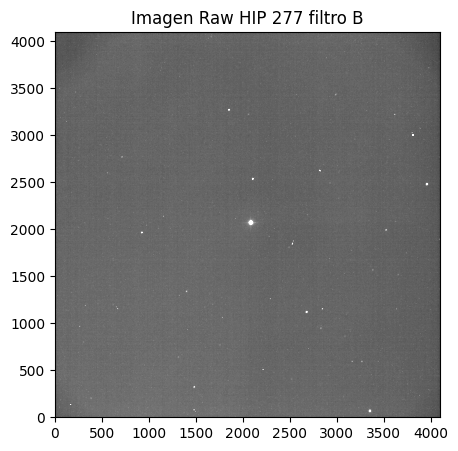

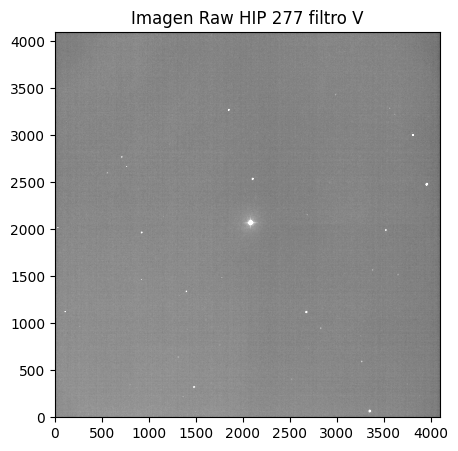

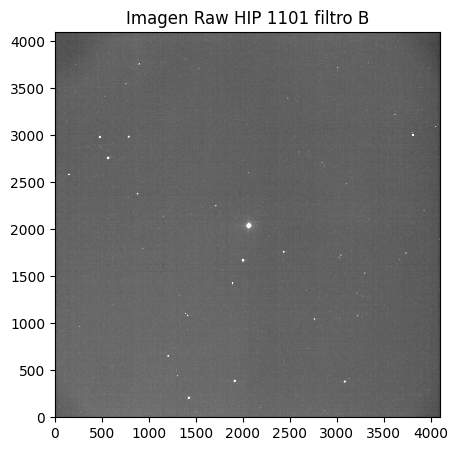

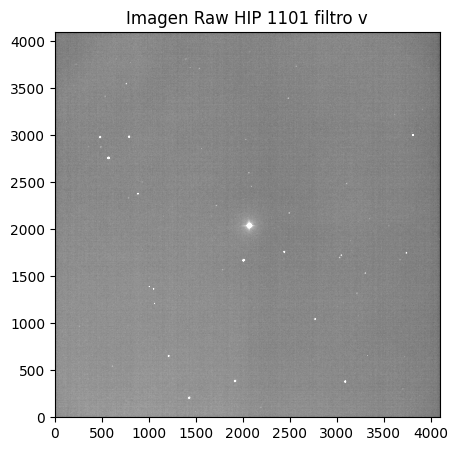

In [16]:
fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(star1_1B[0].data)

plt.imshow(star1_1B[0].data,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen Raw HIP 277 filtro B')
plt.show()

fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(star1_1V[0].data)

plt.imshow(star1_1V[0].data,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen Raw HIP 277 filtro V')
plt.show()

fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(star2_1B[0].data)

plt.imshow(star2_1B[0].data,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen Raw HIP 1101 filtro B')
plt.show()

fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(star2_1V[0].data)

plt.imshow(star2_1V[0].data,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen Raw HIP 1101 filtro v')
plt.show()

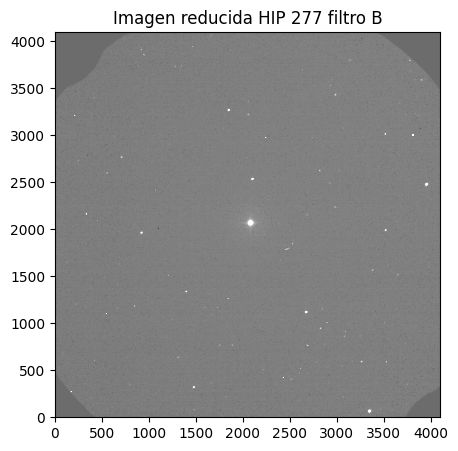

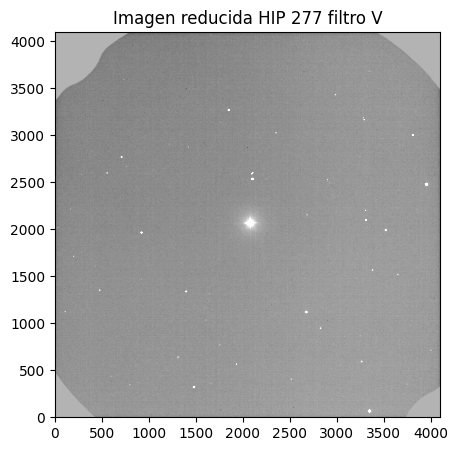

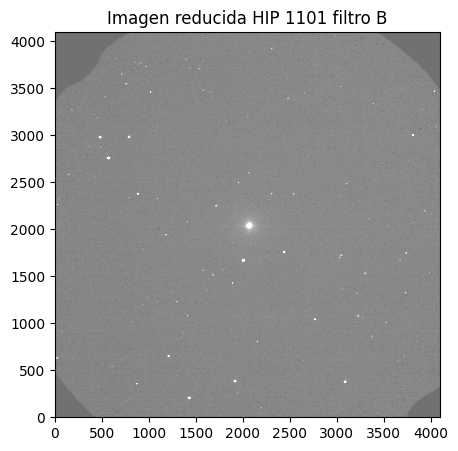

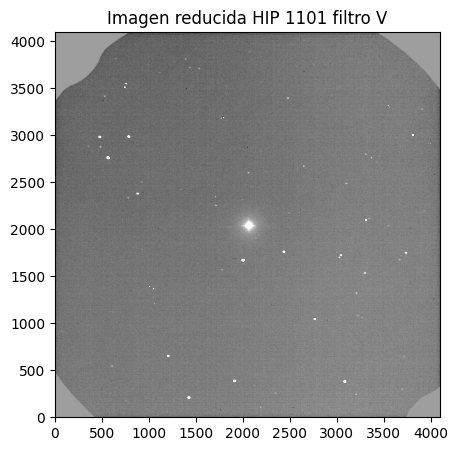

array([[ 0.,  0., -0., ..., -0., -0., -0.],
       [-0., -0.,  0., ..., -0., -0., -0.],
       [-0., -0.,  0., ...,  0., -0., -0.],
       ...,
       [-0.,  0.,  0., ..., -0.,  0.,  0.],
       [-0.,  0.,  0., ..., -0., -0.,  0.],
       [ 0., -0.,  0., ...,  0.,  0., -0.]])

In [17]:
final_star1B = np.mean([red_star_1B_1,red_star_1B_2,red_star_1B_3,red_star_1B_4,red_star_1B_5],axis=0)*bpm
fig=plt.figure(figsize=(5,5))
zscale_1=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale_1.get_limits(final_star1B)

plt.imshow(final_star1B,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen reducida HIP 277 filtro B')
plt.show()


final_star1V = np.mean([red_star_1V_1,red_star_1V_2,red_star_1V_3,red_star_1V_4,red_star_1V_5],axis=0)*bpm
fig=plt.figure(figsize=(5,5))
zscale_2=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale_2.get_limits(final_star1V )

plt.imshow(final_star1V ,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen reducida HIP 277 filtro V')
plt.show()


final_star2B = np.mean([red_star_2B_1,red_star_2B_2,red_star_2B_3,red_star_2B_4,red_star_2B_5],axis=0)*bpm
fig=plt.figure(figsize=(5,5))
zscale_3=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale_3.get_limits(final_star2B)

plt.imshow(final_star2B,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen reducida HIP 1101 filtro B')
plt.show()



final_star2V = np.mean([red_star_2V_1,red_star_2V_2,red_star_2V_3,red_star_2V_4,red_star_2V_5],axis=0)*bpm
fig=plt.figure(figsize=(5,5))
zscale_4=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale_4.get_limits(final_star2V)

plt.imshow(final_star2V,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen reducida HIP 1101 filtro V')
plt.show()

final_star1B

In [18]:
phdu = fits.PrimaryHDU(header = star1_1B[0].header , data = final_star1B)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f'{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}', unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Cortes, G. Guerrero, Martinez'

phdu.writeto('Star1_B.fits', overwrite = True)

#-----------------------------------------------------------------------

phdu = fits.PrimaryHDU(header = star1_1V[0].header , data = final_star1V)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f'{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}', unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Cortes, G. Guerrero, Martinez'

phdu.writeto('Star1_V.fits', overwrite = True)

#-----------------------------------------------------------------------

phdu = fits.PrimaryHDU(header = star2_1B[0].header , data = final_star2B)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f'{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}', unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Cortes, G. Guerrero, Martinez'

phdu.writeto('Star2_B.fits', overwrite = True)

#-----------------------------------------------------------------------

phdu = fits.PrimaryHDU(header = star2_1V[0].header , data = final_star2V)
phdu.data = np.float32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)

coord=SkyCoord(f'{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}', unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales

phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001
phdu.header['OBSERVER'] = 'Cortes, G. Guerrero, Martinez'

phdu.writeto('Star2_V.fits', overwrite = True)